# NOM : BENMALEK
# PRENOM : ZOHIR
# PROMO : Master 1 MID 
# Presentation TP3
-------------------------------------------------------

### Importation des librairies 

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1 - Creation de l'image 

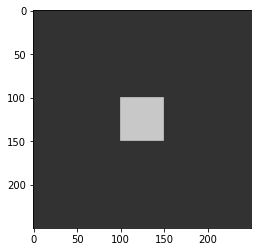

In [54]:
img = np.zeros((250, 250), dtype=np.uint8)
img.fill(50)

# Calculation des coordonnées du caré au milieu 
x = int((250 - 50) / 2)
y = int((250 - 50) / 2)

# Modification des couleurs du carée
img[y:y+50, x:x+50] = 200

# Affichage de l'image
plt.imshow(img, cmap='gray', vmin=0, vmax=255);


### 2 Filtres gradients

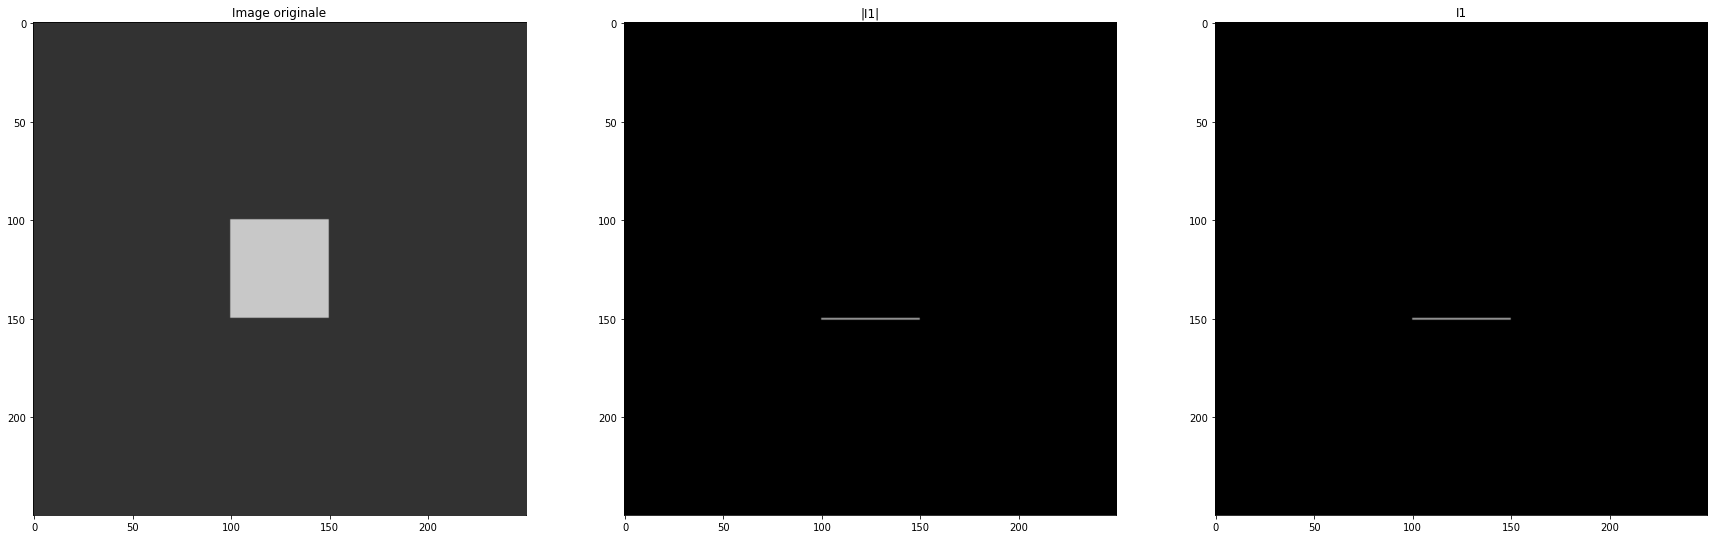

In [61]:
# Appliquer le filtre h1
h1 = np.array([1, -1])
I1 = cv.filter2D(img, -1, h1)

# Afficher l'image d'origine, le module et la phase de I1
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Image originale')

ax[1].imshow(np.abs(I1), cmap='gray')
ax[1].set_title('|I1|')

ax[2].imshow(I1, cmap='gray')
ax[2].set_title('I1')

plt.show()

Le filtre h1 détecte les contours dans la direction horizontale.

 Il est sensible aux transitions clair/foncé et foncé/claire.

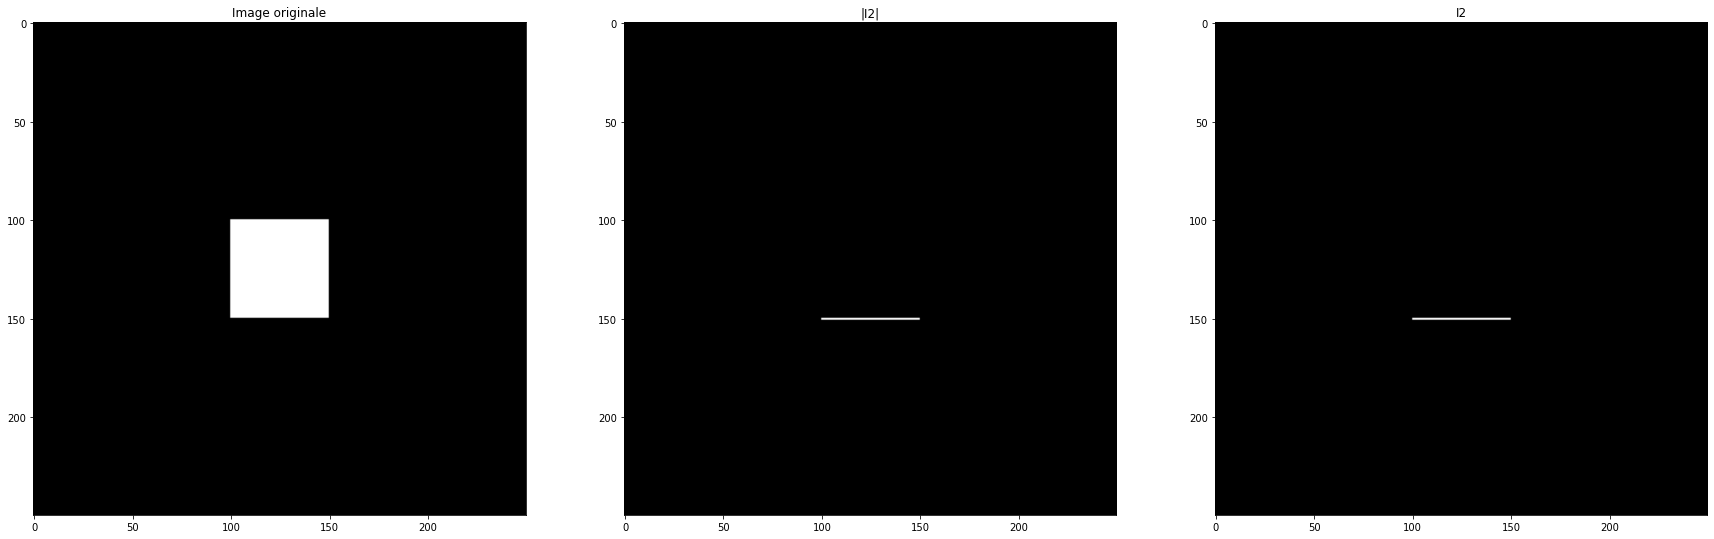

In [82]:
# Appliquer le filtre h2
h2 = np.array([[1], [-1]])
I2 = cv.filter2D(img, -1, h2)

# Afficher l'image d'origine, le module et la phase de I2
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')

ax[1].imshow(np.abs(I2), cmap='gray')
ax[1].set_title('|I2|')

ax[2].imshow(I2, cmap='gray')
ax[2].set_title('I2')

plt.show()


Le filtre h2 détecte les contours diagonaux orientés vers la gauche. 

Il est sensible aux transitions foncé/clair et clair/foncé.

### 3 Filtres de Sobel

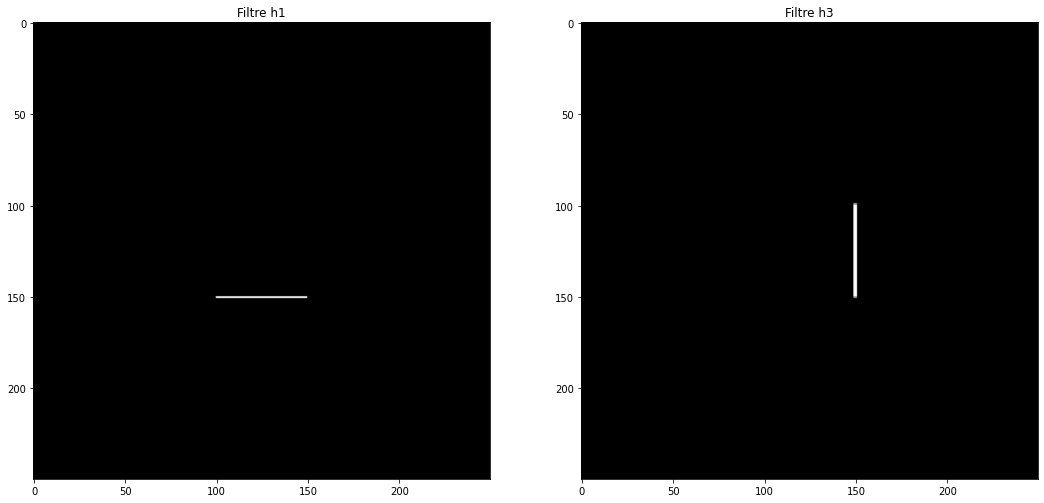

In [79]:
# Appliquer le filtre de Sobel horizontal
h3 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
I3 = cv.filter2D(img, -1, h3)

# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(18,10))

ax[0].imshow(I1, cmap='gray')
ax[0].set_title('Filtre h1')

ax[1].imshow(I3, cmap='gray')
ax[1].set_title('Filtre h3')

plt.show()

Le filtre h3 détecte les contours verticaux. 

Il est plus sensible que h1 et permet de détecter des contours plus fins.

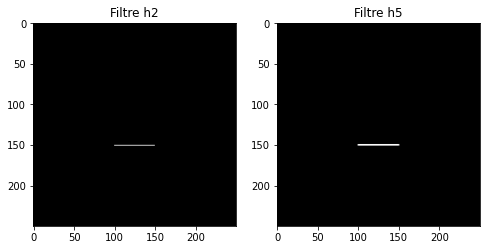

In [38]:
h5 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
I5 = cv.filter2D(img, -1, h5)


# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(I2, cmap='gray')
ax[0].set_title('Filtre h2')

ax[1].imshow(I5, cmap='gray')
ax[1].set_title('Filtre h5')

plt.show()

Le filtre h5 détecte les contours diagonaux orientés vers la gauche. 

Il est plus sensible que h2 et permet de détecter des contours plus fins.

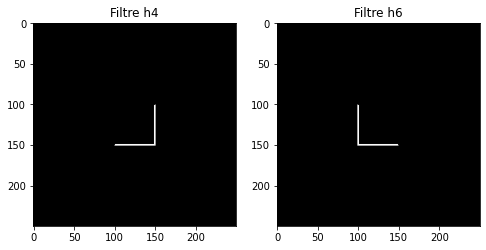

In [31]:
# Appliquer les filtres de Sobel combinés
h4 = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
h6 = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
I4 = cv.filter2D(img, -1, h4)
I6 = cv.filter2D(img, -1, h6)

# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(I4, cmap='gray')
ax[0].set_title('Filtre h4')

ax[1].imshow(I6, cmap='gray')
ax[1].set_title('Filtre h6')

plt.show()

Le filtre h4 est similaire à h3 mais avec des coefficients opposés .

Le filtre h6 est similaire à h5 mais avec des coefficients opposés .

En comparant les résultats, vous pourrez observer que h4 et h6 sont similaires à h3 et h5 respectivement, mais avec des contours inversés en termes de clair/foncé.

### 4 - Filtre Laplacien

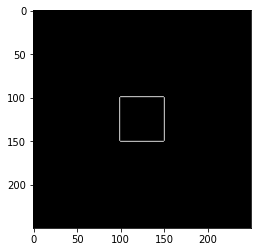

In [42]:
Laplacien = np.array([[0,1,0],[1,-4,1],[0,1,0]])/8
I7  = cv.filter2D(img, -1, Laplacien)
plt.imshow(I7,cmap="gray");

Le filtre Laplacien détecte les contours dans toutes les directions, contrairement aux filtres de Sobel et de gradient qui ne les détectent que dans les directions verticale et horizontale. Il n'est donc pas limité à une seule direction de détection de contours.

### 5 - Filtre LOG

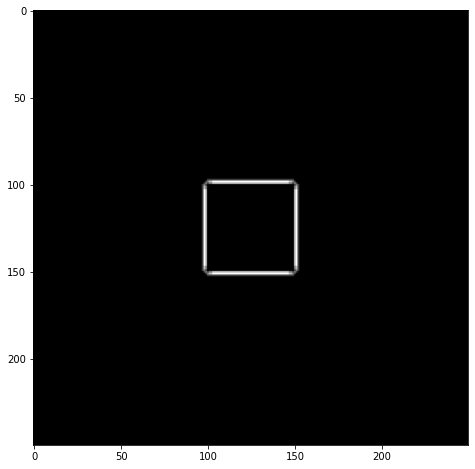

In [95]:
# Appliquer le filtre LOG
I_log = cv.GaussianBlur(img, (15, 15), sigmaX=1)
I8 = cv.filter2D(I_log, -1, Laplacien)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(I8,cmap="gray");

#### Faire varier σ

In [ ]:
# Appliquer le filtre LOG
I_log = cv.GaussianBlur(img, (15, 15), sigmaX=1)
I8 = cv.filter2D(I_log, -1, Laplacien)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(I8,cmap="gray");

In [44]:
# Lire 'pour.tif' 
image = cv.imread("/home/azarmalek/Desktop/Traitement_image/cameraman.tif",0)
C1=cv.filter2D(image, -1, h1)
C2= cv.filter2D(image, -1, h2)
C3=cv.filter2D(image, -1, h3)
C4= cv.filter2D(image, -1, h4)
C5=cv.filter2D(image, -1, h5)
C6= cv.filter2D(image, -1, h6)
C7=cv.filter2D(image, -1, Laplacien)
LOG = cv.GaussianBlur(image, (15, 15), sigmaX=1)
C8 = cv.filter2D(LOG, -1, Laplacien)



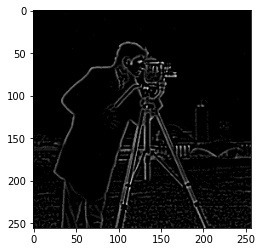

In [81]:
plt.imshow(C8,cmap="gray");

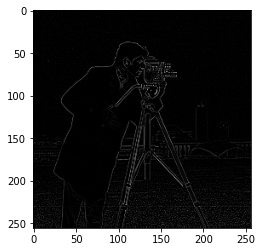

In [80]:
plt.imshow(C7,cmap="gray");